<h1 style = "font-size: 30px; text-align: center;">Machine Learning </h1>
<h1 style = "font-size: 30px; text-align: center;">HW 5</h1>
<h2 style = "font-size: 25px; text-align: center;"> Unsupervised learning </h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Name: Toktam Sameie</h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Student Id: 810896054</h2>
<h4 style="text-align: center">Spring 1400</h4>

<h1 style = "font-size: 25px; ">Question 1 </h1>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import operator
from statistics import mean
import copy

In [77]:
data = pd.read_csv("wine.data")

In [78]:
data.columns = ['Y','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols ','Flavanoids ','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue ','OD280/OD315 of diluted wines ','Proline ']

In [79]:
data.drop('Y', inplace=True, axis=1)

In [80]:
C = [0]*len(data)
data['C'] = C

<h1 style = "font-size: 20px; "> K-means clustring function : </h1>

In [139]:
def K_means_Clustring (K,data):
    mu = [0]*K
    for i in range(K):
        mu[i]  = data.iloc[random.randint(0, 176)]
#     C = [0]*len(data)
    for counter in range(100):
        ##############
        ## Step one ##
        ##############
        for i in range(len(data)):
            temp = [0]*K
            for k in range(K):
                temp[k] = np.linalg.norm(data.iloc[i]-mu[k])
            data['C'][i] = temp.index(min(temp))
        ##############
        ## Step two ##
        ##############
        for k in range(K):
            mu[k] = data[ data['C'] == k ].mean()
    return data        

<h1 style = "font-size: 20px; ">  clustring with k = 2 : </h1>

In [82]:
dt = [data['Alcohol'] ,  data['Ash'] , data['C']]
data_abs = pd.concat(dt, axis=1)

In [88]:
new_data = K_means_Clustring(2,data_abs)

In [84]:
gk = new_data.groupby('C')
c_0 = gk.get_group(0)
c_1 = gk.get_group(1)

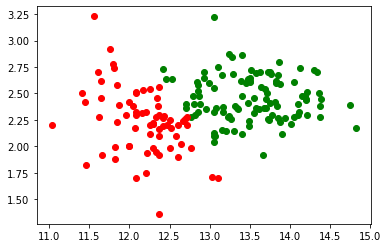

In [87]:
plt.plot(c_0['Alcohol'], c_0['Ash'], 'go',c_1['Alcohol'], c_1['Ash'], 'ro')

<h1 style = "font-size: 20px; ">  clustring with k = 3 : </h1>

In [154]:
data_K_3 = K_means_Clustring(3,data_abs)

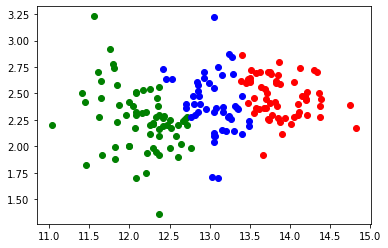

In [91]:
gk3 = data_K_3.groupby('C')
c3_0 = gk3.get_group(0)
c3_1 = gk3.get_group(1)
c3_2 = gk3.get_group(2)
plt.plot(c3_0['Alcohol'], c3_0['Ash'], 'go',c3_1['Alcohol'], c3_1['Ash'], 'ro',c3_2['Alcohol'], c3_2['Ash'], 'bo')

<h1 style = "font-size: 20px; ">  clustring with k = 5 : </h1>

In [155]:
data_K_5 = K_means_Clustring(5,data_abs)

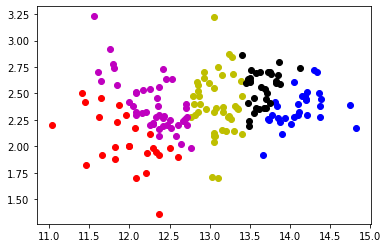

In [16]:
gk5 = data_K_5.groupby('C')
c5_0 = gk5.get_group(0)
c5_1 = gk5.get_group(1)
c5_2 = gk5.get_group(2)
c5_3 = gk5.get_group(3)
c5_4 = gk5.get_group(4)
plt.plot(c5_0['Alcohol'], c5_0['Ash'], 'yo',c5_1['Alcohol'], c5_1['Ash'], 'ro',c5_2['Alcohol'], c5_2['Ash'], 'bo',c5_3['Alcohol'], c5_3['Ash'], 'mo',c5_4['Alcohol'], c5_4['Ash'], 'ko')

<h1 style = "font-size: 20px; ">  clustring with k = 7 : </h1>

In [156]:
data_K_7 = K_means_Clustring(7,data_abs)

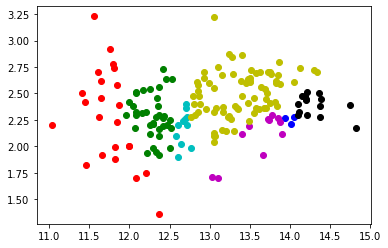

In [141]:
gk7 = data_K_7.groupby('C')
c7_0 = gk7.get_group(0)
c7_1 = gk7.get_group(1)
c7_2 = gk7.get_group(2)
c7_3 = gk7.get_group(3)
c7_4 = gk7.get_group(4)
c7_5 = gk7.get_group(5)
c7_6 = gk7.get_group(6)
plt.plot(c7_0['Alcohol'], c7_0['Ash'], 'go',c7_1['Alcohol'], c7_1['Ash'], 'ro',c7_2['Alcohol'], c7_2['Ash'], 'bo',c7_3['Alcohol'], c7_3['Ash'], 'mo',c7_4['Alcohol'], c7_4['Ash'], 'ko',c7_5['Alcohol'], c7_5['Ash'], 'co',c7_6['Alcohol'], c7_6['Ash'], 'yo')

<h1 style = "font-size: 25px; ">Internal Index : Silhouette</h1>

In [149]:
def Silhouette(df_grouped,K):
    Si = [0]*K
    for i in range(len(df_grouped)):
        ## for cluster i 
        cluster = df_grouped.get_group(i)
        cluster = cluster.set_axis(np.arange(0, len(cluster) , 1), axis='index')
        s_i_cluster = 0
        for j in range(len(cluster)):
            ## for each data xi in this cluster
            a_i = ai(cluster.loc[j].at["Alcohol"],cluster.loc[j].at["Ash"],cluster)
            counter = 0 
            for m in range(len(df_grouped)):
                temp = [0]* (K-1)
                if m != i and counter < K:
                    neighbor_cluster = df_grouped.get_group(m)                     
                    temp[counter] = ai(cluster.loc[j].at["Alcohol"],cluster.loc[j].at["Ash"],neighbor_cluster)
                    counter +=1
            b_i = min(temp)
            s_i_cluster += (b_i - a_i)/max(b_i , a_i)
        Si[i] = s_i_cluster/len(cluster)
        total_mean_si = mean(Si)
    return Si , total_mean_si

In [143]:
def distance(xi,yi,xj,yj):
    return np.sqrt((xi-xj)**2 + (yi-yj)**2)

In [144]:
def ai(xi,yi,cluster):
    Sum = 0
    for i in range(len(cluster)):
        Sum += cluster.apply(lambda row : distance(xi,yi,row['Alcohol'],row['Ash']), axis = 1)
    return Sum.sum()/len(cluster)

In [150]:
Si_3 , total_mean_si_3 = Silhouette(df3,3)
Si_5 , total_mean_si_5 = Silhouette(gk5,5)
Si_7 , total_mean_si_7 = Silhouette(gk7,7)

<h1 style = "font-size: 25px; ">Question 4 <h1/>
<h1 style = "font-size: 25px; ">PCA</h1>

In [5]:
Iris = pd.read_csv("iris.data")

In [6]:
Iris.columns = ['X1','X2','X3','X4','X5']
Iris.drop('X5', inplace=True, axis=1)

In [7]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean_value = df[feature_name].mean()
        df[feature_name] = (df[feature_name] - mean_value) / (max_value - min_value)
    return result

In [8]:
normalized_Iris = normalize(Iris)

In [9]:
def PCA(normalized_Iris,k):
    covariance = normalized_Iris.cov()
    u, s, vh = np.linalg.svd(covariance)
    U_reduced = -u[:,:k]
    Z = np.matmul(Iris,U_reduced)
    return Z , U_reduced 

In [10]:
Z , U_reduced = PCA(normalized_Iris,2)

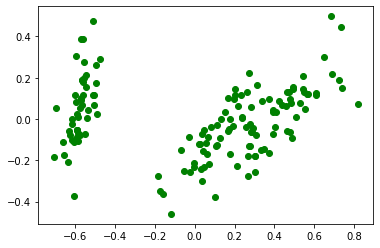

In [12]:
plt.plot(Z.iloc[:,0], Z.iloc[:,1], 'go')

<h1 style = "font-size: 25px; ">Power Method </h1>

In [175]:
def powerMethod_landa_1(A,iteration):
    x = np.array([1, 1, 0, 0])
    for i in range(iteration):
        x = np.dot(A, x)
        landa_1 = abs(x).max()
        x = x / x.max()
    return landa_1 , x

In [176]:
def powerMethod_landa_2(A,landa_1,iteration):
    shifted_A = A - landa_1 * np.identity(len(A))  
    Lan , x_2 = powerMethod_landa_1(shifted_A,iteration)
    landa_2 = Lan + landa_1
    return landa_2 , x_2

In [177]:
covariance = normalized_Iris.cov()
landa_1 , x_1 = powerMethod_landa_1(covariance,100)
landa_2 , x_2 = powerMethod_landa_2(covariance,landa_1,100)

In [178]:
X_1 = (x_1/np.linalg.norm(x_1)).reshape(4,1)
X_2 = (x_2/np.linalg.norm(x_2)).reshape(4,1)
U = np.concatenate((X_1,X_2), axis=1)
U

array([[ 0.36263433, -0.03218843],
       [-0.08122848,  0.90930602],
       [ 0.85629752,  0.24126574],
       [ 0.35868209, -0.33751638]])

In [179]:
Z_PM = np.matmul(normalized_Iris,U)

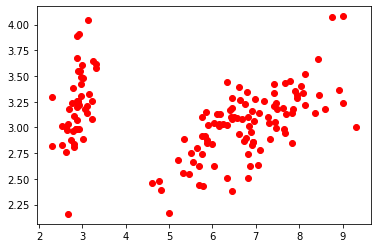

In [185]:
plt.plot(Z_PM.iloc[:,0], Z_PM.iloc[:,1], 'ro')

<h1 style = "font-size: 25px; "> kernel PCA</h1>

In [181]:
from sklearn.decomposition import KernelPCA

In [182]:
transformer = KernelPCA(n_components=2, kernel='sigmoid')
Iris_transformed = transformer.fit_transform(Iris)
Iris_transformed.shape

(149, 2)

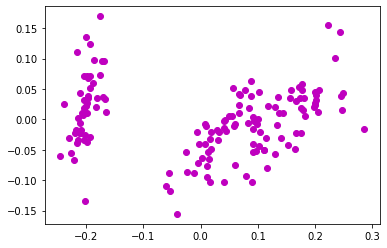

In [183]:
plt.plot(Iris_transformed[:,0], Iris_transformed[:,1], 'mo')